# Picking up patterns

Or the lack thereof. The brain is pretty good at spotting patterns and anomalies. But we have to help it with something that can be easily abstracted. Numbers are not good for that. 

# Of reds and greens and blues

Colors are good helpers. Shades, hues. Unfortunately, many people are affected by colorblindness. It is said that in some segments of the population, up to 8% of men and 0.4% of women experience congenital color deficiency, with the most common being red-green color blindness.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_context("talk")

# Seaborn palettes

According to Seaborn's documentation (http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html), there is a ready made color palette called *colorblind*. There is not a lot of details on this, so I thought I'd experiment with this and ask for feedback. Unfortunately, only 6 colors are available until it starts recycling itself. That is clearly not good if we want to see patterns in numbers that range from 0 to 9 on each digit.

Another interesting choice is *cubehelix*. It works in color and grayscale. You can learn more about it here: http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/

First thing first, let's set it as the default palette, and display it.

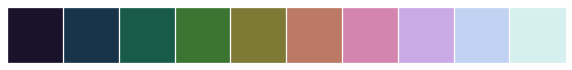

In [2]:
sns.set_palette(sns.color_palette("cubehelix", 10))
sns.palplot(sns.color_palette())

# An infinite source of entertainment

At the very least, an infinite source of digits: *pi*

So we will be plotting a large grid, with each square representing a digit of *pi* and filled in the color corresponding to the color in the Seaborn palette. Let's grab a pi digit generator. There is one here that's been around since the days of python 2.5:

https://www.daniweb.com/programming/software-development/code/249177/pi-generator-update

In [3]:
def pi_generate():
    """
    generator to approximate pi
    returns a single digit of pi each time iterated
    """
    q, r, t, k, m, x = 1, 0, 1, 1, 3, 3
    while True:
        if 4 * q + r - t < m * t:
            yield m
            q, r, t, k, m, x = 10*q, 10*(r-m*t), t, k, (10*(3*q+r))//t - 10*m, x
        else:
            q, r, t, k, m, x = q*k, (2*q+r)*x, t*x, k+1, (q*(7*k+2)+r*x)//(t*x), x+2

# The 10 colors of Pi

We are now ready to do our actual visualization of *pi*. 

For legal size paper, 55x97 is a good size (plus the ratio is the square root of pi). 
For poster, I use *154 x 204 = 31416* digits :)

It'll run for a while, even at the reduced size, probably a good time to go and get your favorite drink...

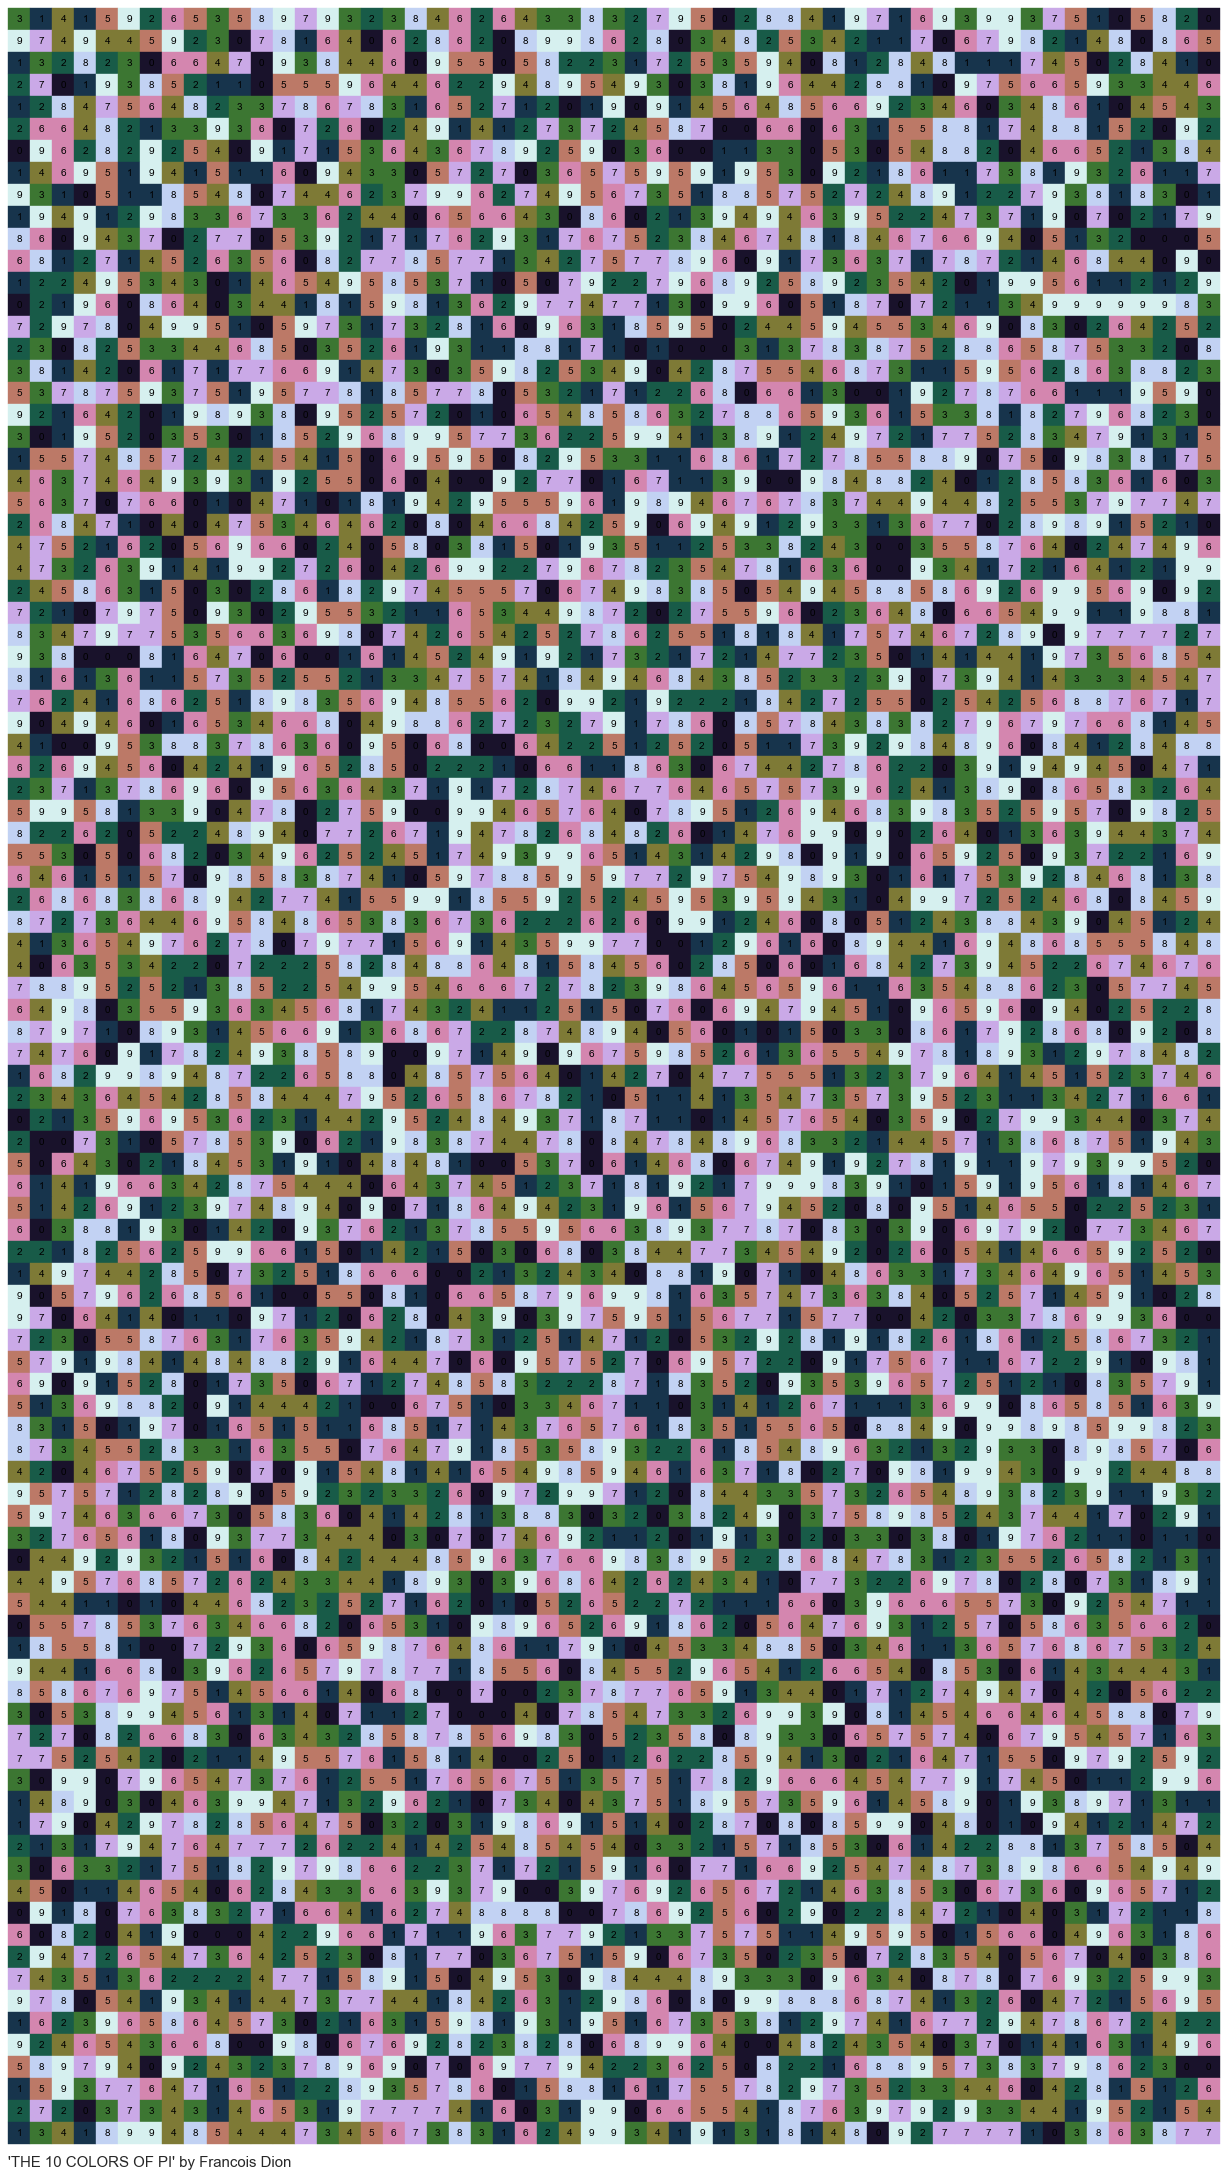

In [4]:
width = 55  # 154
height = 97  # 204 
digit = pi_generate()

fig = plt.figure(figsize=((width + 2) / 3., (height + 2) / 3.))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9),
                  aspect='equal', frameon=False,
                  xlim=(-0.05, width + 0.05),
                  ylim=(-0.05, height + 0.05))

for axis in (ax.xaxis, ax.yaxis):
    axis.set_major_formatter(plt.NullFormatter())
    axis.set_major_locator(plt.NullLocator())
    
for j in range(height-1,-1,-1):
    for i in range(width):
        pi_digit = next(digit)
        ax.add_patch(Rectangle((i, j),
                               width=1,
                               height=1,
                               ec=sns.color_palette()[pi_digit],
                               fc=sns.color_palette()[pi_digit],
                              )
                    )
        ax.text(i + 0.5, j + 0.5,
                pi_digit, color='k',
                fontsize=10,
                ha='center', va='center')
ax.text(0,-1,"'THE 10 COLORS OF PI' by Francois Dion", fontsize=15)